# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)


In [3]:
lz_uri = "spotify:artist:2x7PC78TmgqpEIjaGAZ0Oz"

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
results = spotify.artist_top_tracks(lz_uri)


In [4]:
results

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2x7PC78TmgqpEIjaGAZ0Oz'},
      'href': 'https://api.spotify.com/v1/artists/2x7PC78TmgqpEIjaGAZ0Oz',
      'id': '2x7PC78TmgqpEIjaGAZ0Oz',
      'name': 'Trueno',
      'type': 'artist',
      'uri': 'spotify:artist:2x7PC78TmgqpEIjaGAZ0Oz'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',
     '

In [ ]:
for track in results["tracks"][:10]:
    cancion = track['name']
    popularidad = track['popularity']
    duracion = track['duration_ms']/(1000 * 60)
    print(f"Canción: {cancion}, Popularidad: {popularidad}, Duración: {duracion:.2f} minutos")
    

Canción: REAL GANGSTA LOVE, Popularidad: 80, Duración: 2.42 minutos
Canción: Angelito, Popularidad: 80, Duración: 2.18 minutos
Canción: Mamichula - con Nicki Nicole, Popularidad: 77, Duración: 3.65 minutos
Canción: CRUZ, Popularidad: 77, Duración: 3.07 minutos
Canción: EN LA CITY, Popularidad: 77, Duración: 2.94 minutos
Canción: Cuando Te Vi | CROSSOVER #5, Popularidad: 75, Duración: 3.64 minutos
Canción: SOLO POR VOS, Popularidad: 71, Duración: 3.33 minutos
Canción: FEEL ME??, Popularidad: 70, Duración: 3.12 minutos
Canción: DANCE CRIP, Popularidad: 69, Duración: 2.75 minutos
Canción: Los Aparatos, Popularidad: 70, Duración: 3.88 minutos


In [22]:
dataframe = {
    'canciones': [],
    'popularidad': [],
    'duracion': []
}

for track in results["tracks"][:10]:
    dataframe['canciones'].append(track['name'])
    dataframe['popularidad'].append(track['popularity'])
    dataframe['duracion'].append(round(track['duration_ms']/(1000 * 60), 2))

In [25]:
df = pd.DataFrame(dataframe)
df

,canciones,popularidad,duracion
0,REAL GANGSTA LOVE,80,2.42
1,Angelito,80,2.18
2,Mamichula - con Nicki Nicole,77,3.65
3,CRUZ,77,3.07
4,EN LA CITY,77,2.94
5,Cuando Te Vi | CROSSOVER #5,75,3.64
6,SOLO POR VOS,71,3.33
7,FEEL ME??,70,3.12
8,DANCE CRIP,69,2.75
9,Los Aparatos,70,3.88


In [26]:
df.to_csv("truenotop10.csv", index=False)

In [28]:
df = pd.read_csv('truenotop10.csv')
df

,canciones,popularidad,duracion
0,REAL GANGSTA LOVE,80,2.42
1,Angelito,80,2.18
2,Mamichula - con Nicki Nicole,77,3.65
3,CRUZ,77,3.07
4,EN LA CITY,77,2.94
5,Cuando Te Vi | CROSSOVER #5,75,3.64
6,SOLO POR VOS,71,3.33
7,FEEL ME??,70,3.12
8,DANCE CRIP,69,2.75
9,Los Aparatos,70,3.88


In [31]:
populares = df.sort_values(by="popularidad", ascending=False)
populares.head(3)

,canciones,popularidad,duracion
0,REAL GANGSTA LOVE,80,2.42
1,Angelito,80,2.18
2,Mamichula - con Nicki Nicole,77,3.65


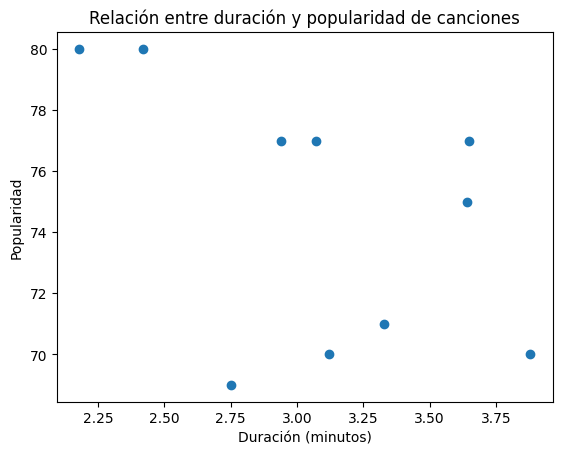

In [32]:
plt.scatter(x=df["duracion"], y=df["popularidad"])

plt.title("Relación entre duración y popularidad de canciones")
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")

plt.show()

In [33]:
print(df["duracion"].corr(df["popularidad"]))

-0.4815068905241085


# ¿Hay alguna relación entre la duración y la popularidad?
- Realmente no la hay, el gráfico muestra los puntos de manera dispersa y no encuentro algún patrón que demuestre que la respuesta sea afirmativa.
- Las canciones con más popularidad de este artista están en el punto mínimo de la duración, sin embargo, hay puntos que también se encuentran con una mayor duración y y están muy cerca de estar en la mayor popularidad de sus canciones.
- Aparte de no ver algún patrón entre los puntos, saqué la variable de correlación entre la duración y la popularidad y esta es negativa, por lo que aquí nos demuestra que no tienen alguna relación. 